<a href="https://colab.research.google.com/github/safacharfi/XGBoost-Based-House-Price-Prediction-Model/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [5]:
import numpy as np  # For numerical computations and working with arrays
import pandas as pd  # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For plotting and visualizing data
import seaborn as sns  # For advanced statistical data visualization (built on top of matplotlib)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split  # To split data into training and testing sets

from xgboost import XGBRegressor  # For using the XGBoost algorithm in regression tasks

from sklearn import metrics  # To evaluate the performance of the model (e.g., accuracy, mean squared error)


Importing the  dataset

```
`# This is formatted as code`
```



In [6]:
house_price_dataset = fetch_california_housing()


In [7]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [9]:
#loading the dataset into a pandas Dataframe to make it more clear
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [10]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
#add the target column to the dataframe
house_price_dataframe['price']=house_price_dataset.target

In [12]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
#checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

Data Preprocessing

In [14]:
#checking for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [15]:
#statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset
two types of coorelation
1.positive correlation
2.negative correlation

In [16]:
correlation=house_price_dataframe.corr()

<Axes: >

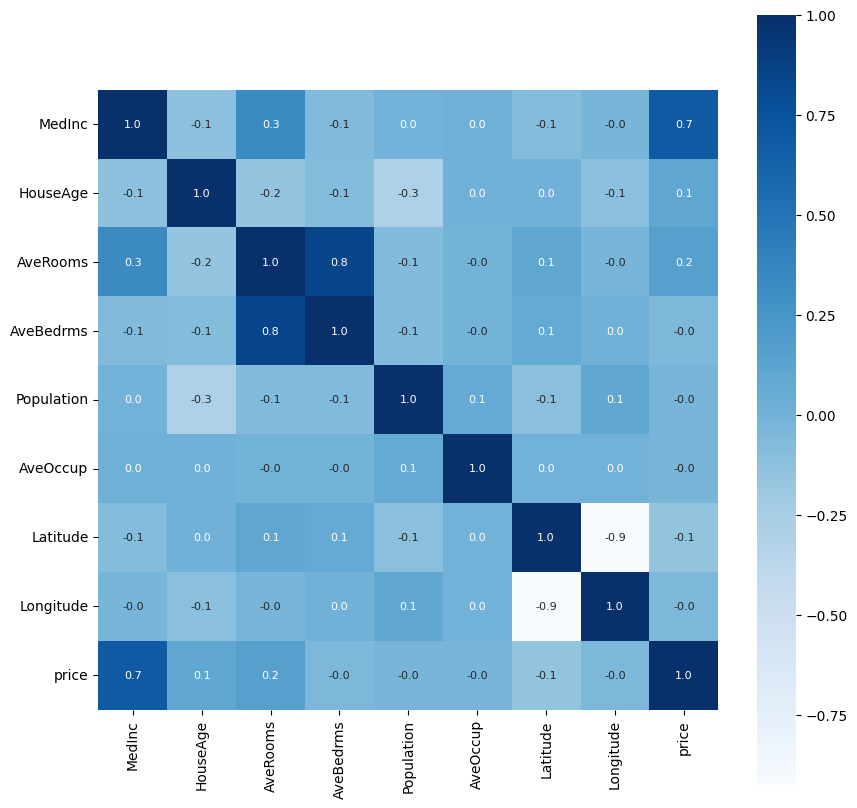

In [17]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))  # Set the size of the heatmap figure to 10x10 inches
sns.heatmap(
    correlation,            # The correlation matrix to visualize
    cbar=True,              # Display a color bar on the right side of the heatmap
    square=True,            # Ensure that each cell in the heatmap is square-shaped
    fmt='.1f',              # Format the annotation to display with one decimal place
    annot=True,             # Annotate each cell with its numeric value
    annot_kws={'size': 8},  # Set the font size of the annotation text to 8
    cmap='Blues'            # Use the 'Blues' color map for the heatmap
)

Splitting the data and the Target


In [18]:
X=house_price_dataframe.drop(['price'],axis=1)
Y=house_price_dataframe['price']

In [19]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Traning data & test data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training
XGBoost Regressor: A machine learning model for predicting continuous values using gradient boosting.


In [21]:
#loading the model
model=XGBRegressor()

In [22]:
#training the model with X_train,Y_Train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [23]:
#prediction on training data
#accuracy for prediction on training data
training_Data_prediction=model.predict(X_train)
print(training_Data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [24]:
# R-squared Error (Coefficient of Determination)
# Measures the proportion of variance in the dependent variable that is predictable from the independent variables.
# R-squared ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data.
score_1 = metrics.r2_score(Y_train, training_Data_prediction)
print(f"R-squared Error: {score_1}")

# Mean Absolute Error (MAE)
# Measures the average magnitude of errors in a set of predictions, without considering their direction.
# MAE is the average over the test sample of the absolute differences between prediction and actual observation.
# Lower MAE indicates better model performance.
score_2 = metrics.mean_absolute_error(Y_train, training_Data_prediction)
print(f"Mean Absolute Error: {score_2}")


R-squared Error: 0.943650140819218
Mean Absolute Error: 0.1933648700612105


Visualizing the actual prices and the predicted ones

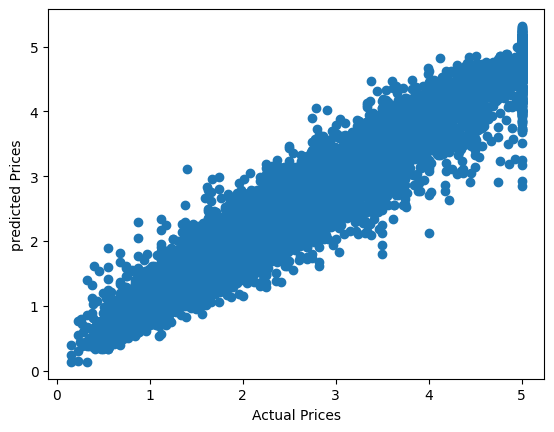

In [26]:
plt.scatter(Y_train,training_Data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("predicted Prices")
plt.show()